In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
#Python module that provides classes and functions for the estimation of
# many different statistical models, as well as for conducting statistical
# tests, and statistical data exploration
import scipy.stats as st
#module contains a large number of probability distributions, summary and frequency statistics, correlation functions and
# statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
#Seaborn is an open-source Python library built on top of matplotlib. 
#It is used for data visualization and exploratory data analysis.
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
#Numerical python functions written for compatibility with MATLAB commands with the same names. 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Preparation 


In [3]:
df=pd.read_csv("framingham.csv")

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Remove 'education' column from the dataset as it is not an important feature in predicting Heart Disease


In [4]:
df.drop(['education'],axis=1,inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Rename 'male' column to 'Sex_male' column -"1" means male and "0" means female 


In [5]:
df.rename(columns ={'male':'Sex_male'},inplace = True)
#“1”, means “Yes”, “0” means “No”
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
count =0
for i in df.isnull().sum(axis = 1):
  if i>0:
     count+=1
print('Total number of rows with missing values is ', count)     
print('since it is only',round((count/len(df.index))*100), 
      'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [8]:
df.dropna(axis=0,inplace =True)
#deletes records(rows) with null values from dataframe

Exploratory Analysis 

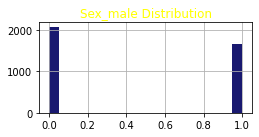

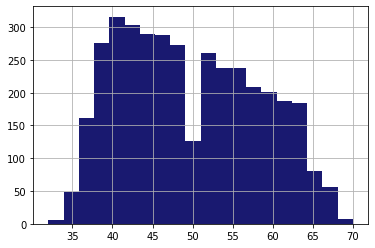

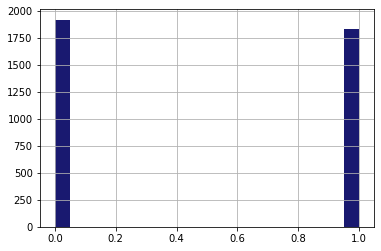

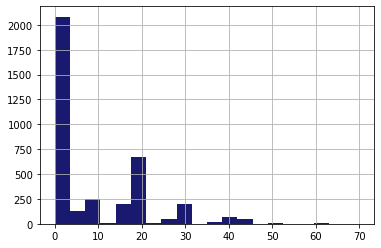

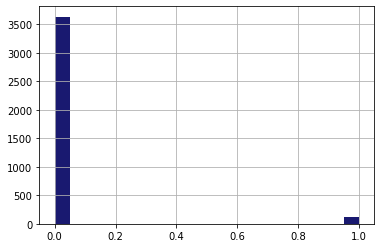

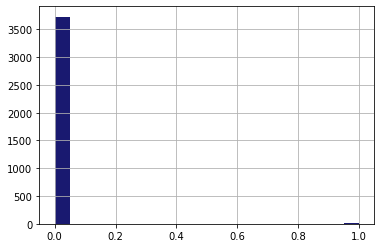

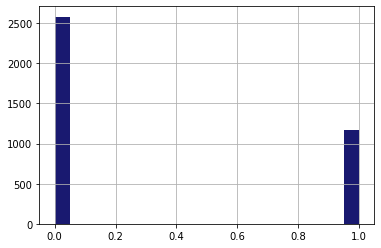

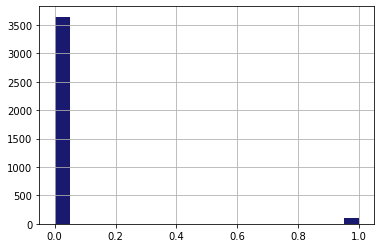

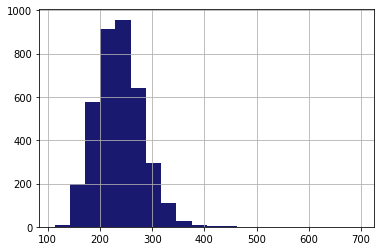

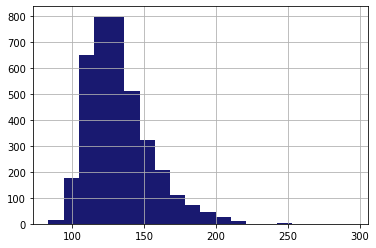

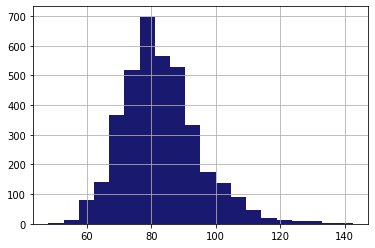

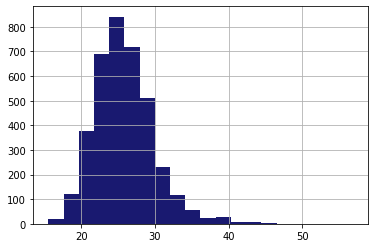

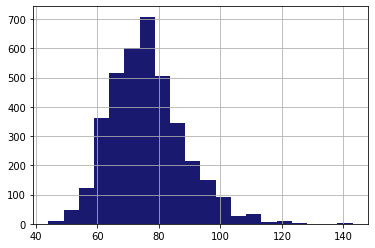

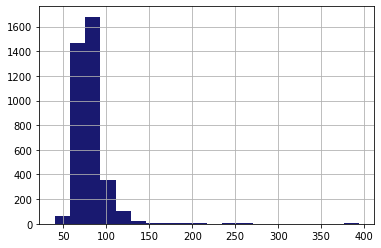

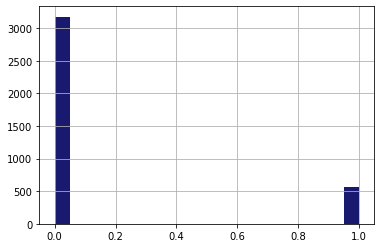

In [9]:
def draw_histogram(dataframe ,features, rows,columns):
  #create a figure obj 'fig' using figsize argument 
  fig = plt.figure(figsize=(10,10))

  for i,feature in enumerate(features):
    ax=fig.add_subplot(rows,columns,i+1)#creates a subplot grid of rows*columns 
    #and adds ax at i+1th position in the grid
    dataframe[feature].hist(bins=20,facecolor='midnightblue')
    #creates a histogram at ax grid position 
    #bins-defines the number of equal-width bins in the range.
    ax.set_title(feature+" Distribution",color='Yellow')
    fig.tight_layout()
    plt.show()
draw_histogram(df,df.columns,6,3)    



In [10]:
df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

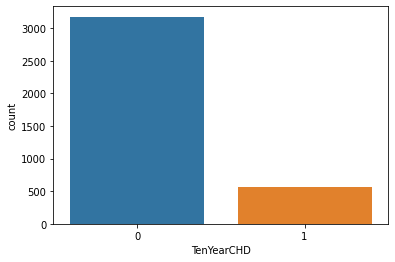

In [11]:
sn.countplot(x='TenYearCHD',data =df)

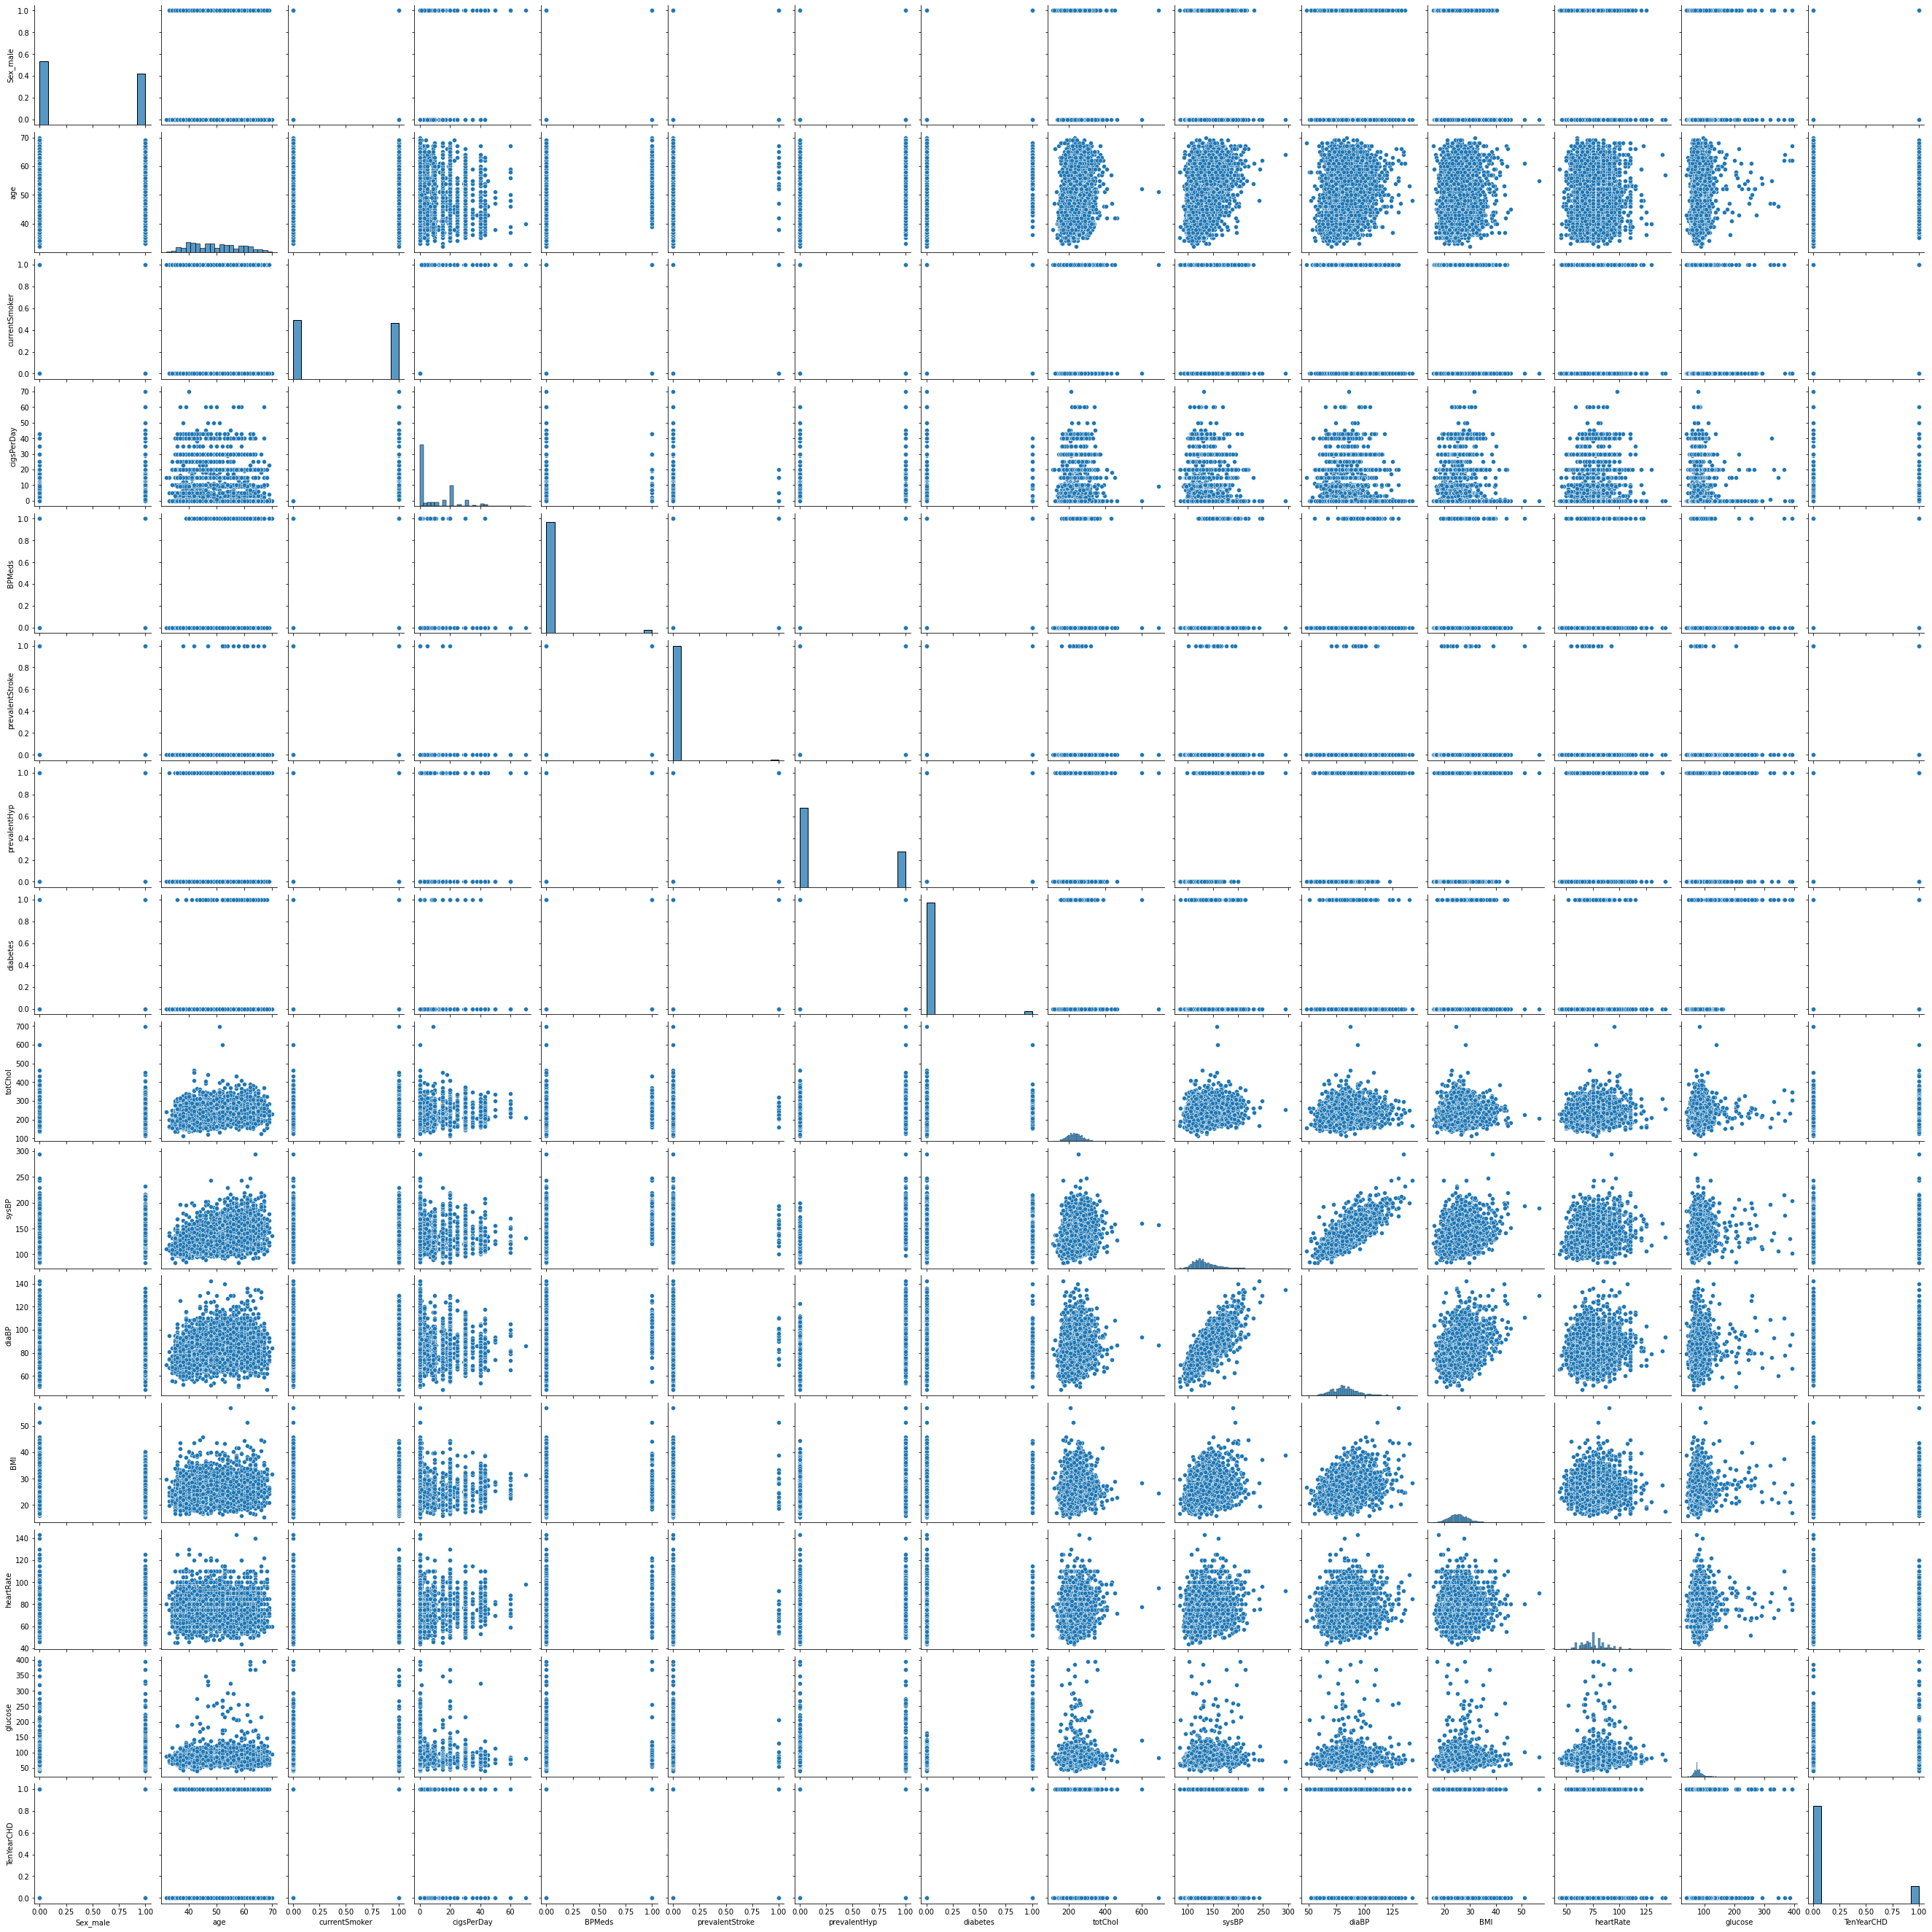

In [12]:
sn.pairplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


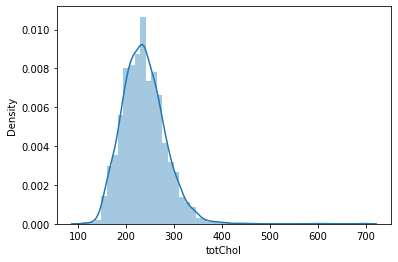

In [13]:
sn.distplot(df["totChol"])

In [14]:
print("skewness: %f" %df["totChol"].skew())
print("kurtosis: %f" %df["totChol"].kurt())
#Skewness is  measure of asymmetry of the  distribution of a real-valued random variable about its mean
#kurtosis helps to find outliers which are far away values from the mean eg. if mean = 20 then 150 will be outlier

skewness: 0.912234
kurtosis: 4.531628


In [15]:
from scipy import stats
from scipy.stats import norm,skew

mu =236.95 and sigma = 44.60


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'TotalCholestrolDistribution')

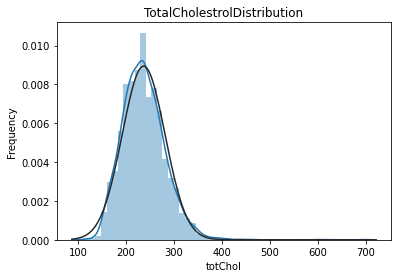

In [16]:
sn.distplot(df["totChol"],fit = norm)
(mu,sigma)= norm.fit(df["totChol"])
print("mu ={:.2f} and sigma = {:.2f}".format(mu,sigma))
plt.ylabel("Frequency")
plt.title("TotalCholestrolDistribution")

In [17]:
print("skewness: %f" %df["totChol"].skew())
print("kurtosis: %f" %df["totChol"].kurt())

skewness: 0.912234
kurtosis: 4.531628


In [18]:
df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [19]:
df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Scale the features 

In [20]:
#scale the features to between 0 to 1
new_features= df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
scaler=MinMaxScaler((0,1))
x=scaler.fit_transform(new_features)


Split the data 


In [21]:
from sklearn.model_selection import train_test_split
new_features= df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]

x= new_features.iloc[:,:-1]
y= new_features.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

Use Logistic Regression Algorithm

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

87.06666666666666

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[645,   2],
       [ 95,   8]])

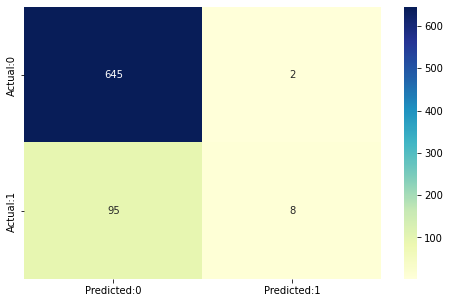

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")